In [124]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve ,roc_auc_score, precision_score, recall_score
import sys

In [125]:
data = pd.read_csv("yeast_csv.csv")

In [126]:
df = pd.DataFrame(data)

In [127]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class_protein_localization
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [128]:
log_reg = LogisticRegression(max_iter= 20000,multi_class='ovr')
features = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
X = df[features].to_numpy()
std_scaler = preprocessing.StandardScaler().fit(X)
X = std_scaler.fit_transform(X)
y = df.class_protein_localization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_reg.fit(X_train,y_train)
classes = log_reg.classes_
print(classes)

['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']


In [129]:
coefs=log_reg.coef_

In [130]:
intercepts=log_reg.intercept_
sklearn_coef = np.empty([len(classes),len(features)+1])
i = 0
for i in range (10):
    curr_coef=[]
    curr_coef.append(intercepts[i])
    curr_coef.extend(coefs[i])
    sklearn_coef[i]=curr_coef
sklearn_coef    

array([[-1.00742360e+00, -1.81575939e-02, -2.30551005e-01,
         6.69696800e-01, -4.44049629e-01, -5.04200109e-02,
        -2.47568413e-01,  1.65247582e-01, -5.17908719e-01],
       [-1.14211544e+01,  9.24579437e-01,  8.47215579e-01,
        -1.97745312e-01,  5.62626983e-01,  8.69939643e-01,
        -4.36321932e-03,  2.86074604e-01, -3.45602594e-01],
       [-6.39330205e+00,  1.12930831e+00,  1.53284148e+00,
         7.18240685e-01, -6.08475469e-01, -4.40228889e-01,
        -1.91482875e-01, -4.58963424e-01, -7.21590607e-01],
       [-7.32329315e+00,  1.33188197e+00,  1.42949374e+00,
        -1.09828581e+00, -2.01796118e-01, -4.52332007e-01,
        -1.44396292e-01,  4.21021845e-01,  4.48238485e-01],
       [-4.58908935e+00,  1.50738583e+00, -4.03619741e-01,
        -7.66052311e-01, -3.15208698e-02, -1.85109587e-02,
        -2.58621227e-01,  4.35607566e-03, -5.29841218e-01],
       [-4.22795586e+00, -1.24505284e+00, -4.05263915e-02,
        -2.71820567e+00, -3.87444275e-01,  4.481862

In [131]:
log_reg.predict(X_test)

array(['MIT', 'MIT', 'CYT', 'CYT', 'ME3', 'MIT', 'CYT', 'CYT', 'CYT',
       'ME3', 'ME3', 'MIT', 'NUC', 'CYT', 'NUC', 'NUC', 'ME2', 'ME3',
       'ME3', 'CYT', 'NUC', 'NUC', 'ME3', 'NUC', 'MIT', 'CYT', 'MIT',
       'NUC', 'CYT', 'ME3', 'CYT', 'CYT', 'ME3', 'NUC', 'CYT', 'CYT',
       'POX', 'CYT', 'NUC', 'MIT', 'CYT', 'ME3', 'CYT', 'CYT', 'CYT',
       'MIT', 'NUC', 'NUC', 'CYT', 'NUC', 'NUC', 'CYT', 'ME3', 'CYT',
       'NUC', 'CYT', 'CYT', 'MIT', 'CYT', 'ME3', 'NUC', 'NUC', 'CYT',
       'EXC', 'NUC', 'CYT', 'ME2', 'CYT', 'CYT', 'CYT', 'CYT', 'CYT',
       'MIT', 'CYT', 'ME1', 'CYT', 'MIT', 'CYT', 'CYT', 'MIT', 'MIT',
       'CYT', 'ME3', 'MIT', 'NUC', 'MIT', 'NUC', 'MIT', 'ME1', 'CYT',
       'CYT', 'CYT', 'MIT', 'CYT', 'ME3', 'EXC', 'NUC', 'MIT', 'CYT',
       'NUC', 'CYT', 'CYT', 'ME3', 'CYT', 'ME3', 'CYT', 'MIT', 'MIT',
       'CYT', 'NUC', 'NUC', 'NUC', 'CYT', 'NUC', 'NUC', 'NUC', 'CYT',
       'NUC', 'CYT', 'NUC', 'MIT', 'CYT', 'MIT', 'ME3', 'NUC', 'MIT',
       'CYT', 'CYT',

In [132]:
log_reg.score(X_test,y_test)

0.5979591836734693

## Gradient descent for logistic regression 

In [133]:
def gradient_descend (X, y ,n_iteration= 10000, learning_rate = 0.8):
    m,n = np.shape(X)
    beta = np.random.uniform(-10,10,n)
    for i in range (n_iteration):
        error = sigmoid(X,beta)-y
        sub = X.T@error
        beta -= learning_rate*(1/m)*sub
    return beta    

In [134]:
def sigmoid (X,beta):
    return 1/(1+np.exp(-1*(X@beta)))

In [135]:
#X= sm.add_constant(X)

#beta = gradient_descend(X,y)


## class for multiclass logistic regresssion

In [136]:
class MultiClassLogistic :
    def __init__(self,X,y,classes):
        self.X = X
        self.y = y
        self.set_classes = classes
        self.no_of_classes = len(self.set_classes)
        self.map = self.set_map()
        self.betas = self.beta_s(self.X)
        self.m = np.size(self.y)
    def set_map(self):
        dict = {}
        i = 0
        for x in self.set_classes:
            dict[i] = x
            i+=1
        return dict  
    def beta_s (self,X):
        m,n = np.shape(X)
        betas=np.empty([self.no_of_classes,n])
        
        for i in range (0,self.no_of_classes):
            curr_y = self.get_y_forclass(i)
            betas[i]=(gradient_descend(X,curr_y))
        return betas    
    def get_y_forclass(self,key):
        needed_class = self.map[key]
        new_y = [1 if item == needed_class else 0 for item in self.y]
        return new_y
    def predict (self,X):
        (m,n) = np.shape(X)
        class_Scores=1/(1+np.exp(-1*(X@self.betas.T)))
        predictions = []
        for i in range (m):
            predictions.append(self.get_predicted_class(class_Scores[i]))
        return predictions    
    def get_predicted_class(self,class_score):
        maxi = -1*sys.maxsize
        key = -1
        for i in range (len(class_score)):
             val = class_score[i]
             if val> maxi:
                key =i
                maxi = val
                
        return self.map[key]  
    def get_score(self,predicted_y,actual_y):
        n = np.size(actual_y)
        correct = 0
        for i in range (n):
            if(predicted_y[i]==actual_y[i]):
                correct+=1
        return (correct/n)        

In [137]:
my_model = MultiClassLogistic(sm.add_constant(X_train),y_train,classes)
estimated_beta=my_model.betas
estimated_beta

array([[-1.01089560e+00, -1.72656799e-02, -2.31830849e-01,
         6.75576700e-01, -4.48617856e-01, -5.07674225e-02,
        -2.52606805e-01,  1.67450616e-01, -5.23885453e-01],
       [-1.30639868e+01,  1.26027696e+00,  9.00930643e-01,
        -1.19660497e-01,  1.26455396e+00,  9.18100870e-01,
        -1.91481890e+00,  8.45594494e-01, -2.12744782e+00],
       [-7.53301723e+00,  1.23542414e+00,  1.81394932e+00,
         8.60119561e-01, -9.12094072e-01, -2.41654436e+00,
        -2.69406009e+00, -5.07340458e-01, -1.06297366e+00],
       [-9.62229005e+00,  1.52583853e+00,  1.69499179e+00,
        -1.22315218e+00, -3.32638783e-01, -6.65669172e+00,
        -8.35444908e+00,  5.03433448e-01,  6.25350558e-01],
       [-5.58022409e+00,  1.62064189e+00, -4.95317340e-01,
        -8.05331332e-01, -2.35537675e-02, -2.14366672e-02,
        -8.92475012e+00,  1.94454978e-03, -6.05355856e-01],
       [-5.03039796e+00, -1.34609631e+00, -4.34254476e-02,
        -2.90654246e+00, -4.03105574e-01,  5.018141

## Compare between coefs from gradient descent and sklearn

In [91]:
np.subtract(sklearn_coef,estimated_beta)

array([[ 3.47199812e-03, -8.91914075e-04,  1.27984466e-03,
        -5.87990018e-03,  4.56822671e-03,  3.47411628e-04,
         5.03839116e-03, -2.20303453e-03,  5.97673372e-03],
       [-1.68975745e-02, -2.10488329e-01, -1.26301003e-02,
        -6.94235100e-02, -4.33907244e-01,  5.35541640e-02,
        -5.57556360e-02, -3.45633487e-01,  1.01474925e+00],
       [ 1.05271006e+00, -1.05974247e-01, -2.80854254e-01,
        -1.41758205e-01,  3.03249713e-01,  3.37955627e+00,
         2.51438068e-01,  4.83352344e-02,  3.40906156e-01],
       [ 1.34321316e+00, -2.10176865e-01, -2.85711325e-01,
         1.35102643e-01,  1.37901116e-01,  3.64363841e+00,
         3.09512287e-01, -8.86558969e-02, -1.85353307e-01],
       [ 1.61732247e-01, -1.13223621e-01,  9.16751863e-02,
         3.92773361e-02, -7.94130835e-03,  2.92103928e-03,
         2.99925236e-01,  2.42406786e-03,  7.54319458e-02],
       [ 5.25015704e-01,  1.01043474e-01,  2.89905616e-03,
         1.88336791e-01,  1.56612986e-02, -5.362786

In [92]:
predicted_y=my_model.predict(sm.add_constant(X_test))

In [93]:
my_model.get_score(predicted_y,y_test.to_numpy())

0.5979591836734693

## Study performance for the model

/home/shimaa/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


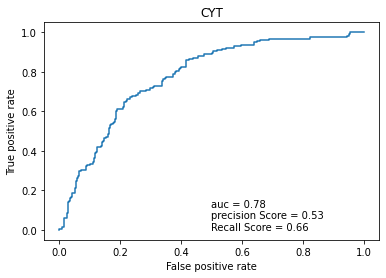

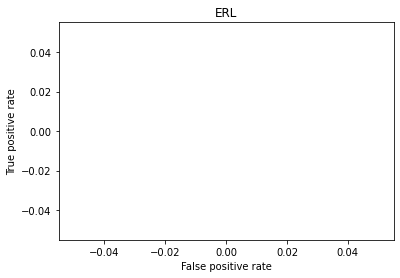

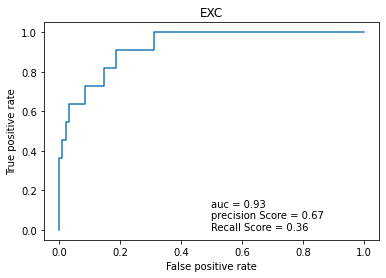

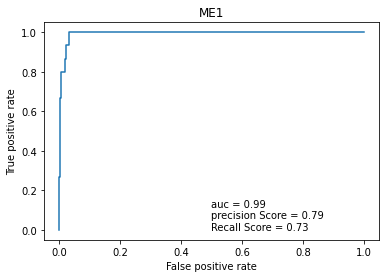

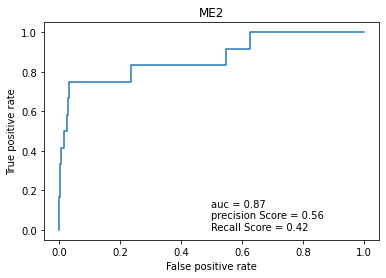

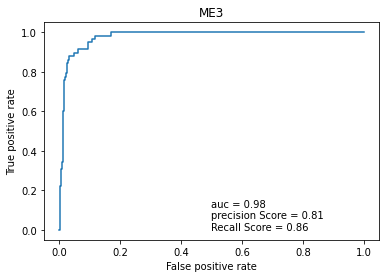

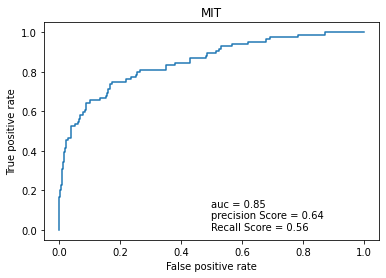

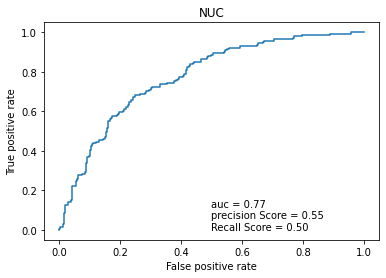

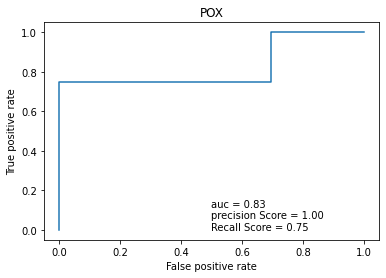

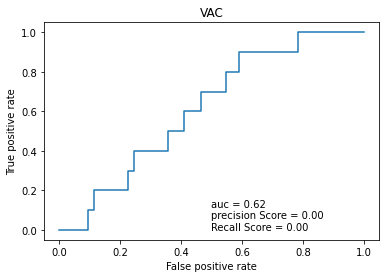

<Figure size 432x288 with 0 Axes>

In [152]:


for i in range (len(classes)):
    proba = log_reg.predict_proba(X_test).T[i]
    y_predicted = log_reg.predict(X_test)
    np.shape(proba)
    fpr, tpr, thresholds = roc_curve(y_test, proba, pos_label=classes[i])
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(classes[i])
    auc = 0
    pre_score = 0
    rec_score = 0
    y_true = [1 if item == classes[i] else 0 for item in y_test ]
    y_predicted_bin = [1 if item == classes[i] else 0 for item in y_predicted]
    try:
        auc = roc_auc_score(y_true,proba)
        pre_score = precision_score(y_true,y_predicted_bin,zero_division=0)
        rec_score = recall_score(y_true, y_predicted_bin)
    except:
        auc = 0
    plt.annotate("auc = {:.2f}\nprecision Score = {:.2f}\nRecall Score = {:0.2f} ".format(auc,pre_score,rec_score),xy=(0.5,0))
    plt.figure()